In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
# All flights
db = pd.read_csv("AUS_10K_RAW_Regression.csv")

In [91]:
# Arrival delayed flights
db = pd.read_csv("AUS_10K_ARRDELAY_Regression.csv")

In [93]:
db = db.drop("ORIGIN_AIRPORT_SEQ_ID", axis = 1)
db = db.drop("CARRIER_DELAY", axis = 1)
db = db.drop("ARR_DELAY", axis = 1)
db = db.drop(db.columns[0], axis = 1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   10000 non-null  int64  
 1   DAY_OF_MONTH            10000 non-null  int64  
 2   DAY_OF_WEEK             10000 non-null  int64  
 3   MKT_CARRIER_AIRLINE_ID  10000 non-null  int64  
 4   OP_CARRIER_FL_NUM       10000 non-null  int64  
 5   DEST_AIRPORT_SEQ_ID     10000 non-null  int64  
 6   CRS_DEP_TIME            10000 non-null  int64  
 7   DEP_TIME                10000 non-null  float64
 8   DEP_DELAY               10000 non-null  float64
 9   CRS_ARR_TIME            10000 non-null  int64  
 10  ARR_TIME                10000 non-null  float64
 11  CRS_ELAPSED_TIME        10000 non-null  float64
 12  ACTUAL_ELAPSED_TIME     10000 non-null  float64
 13  DISTANCE                10000 non-null  float64
 14  WEATHER_DELAY           10000 non-null 

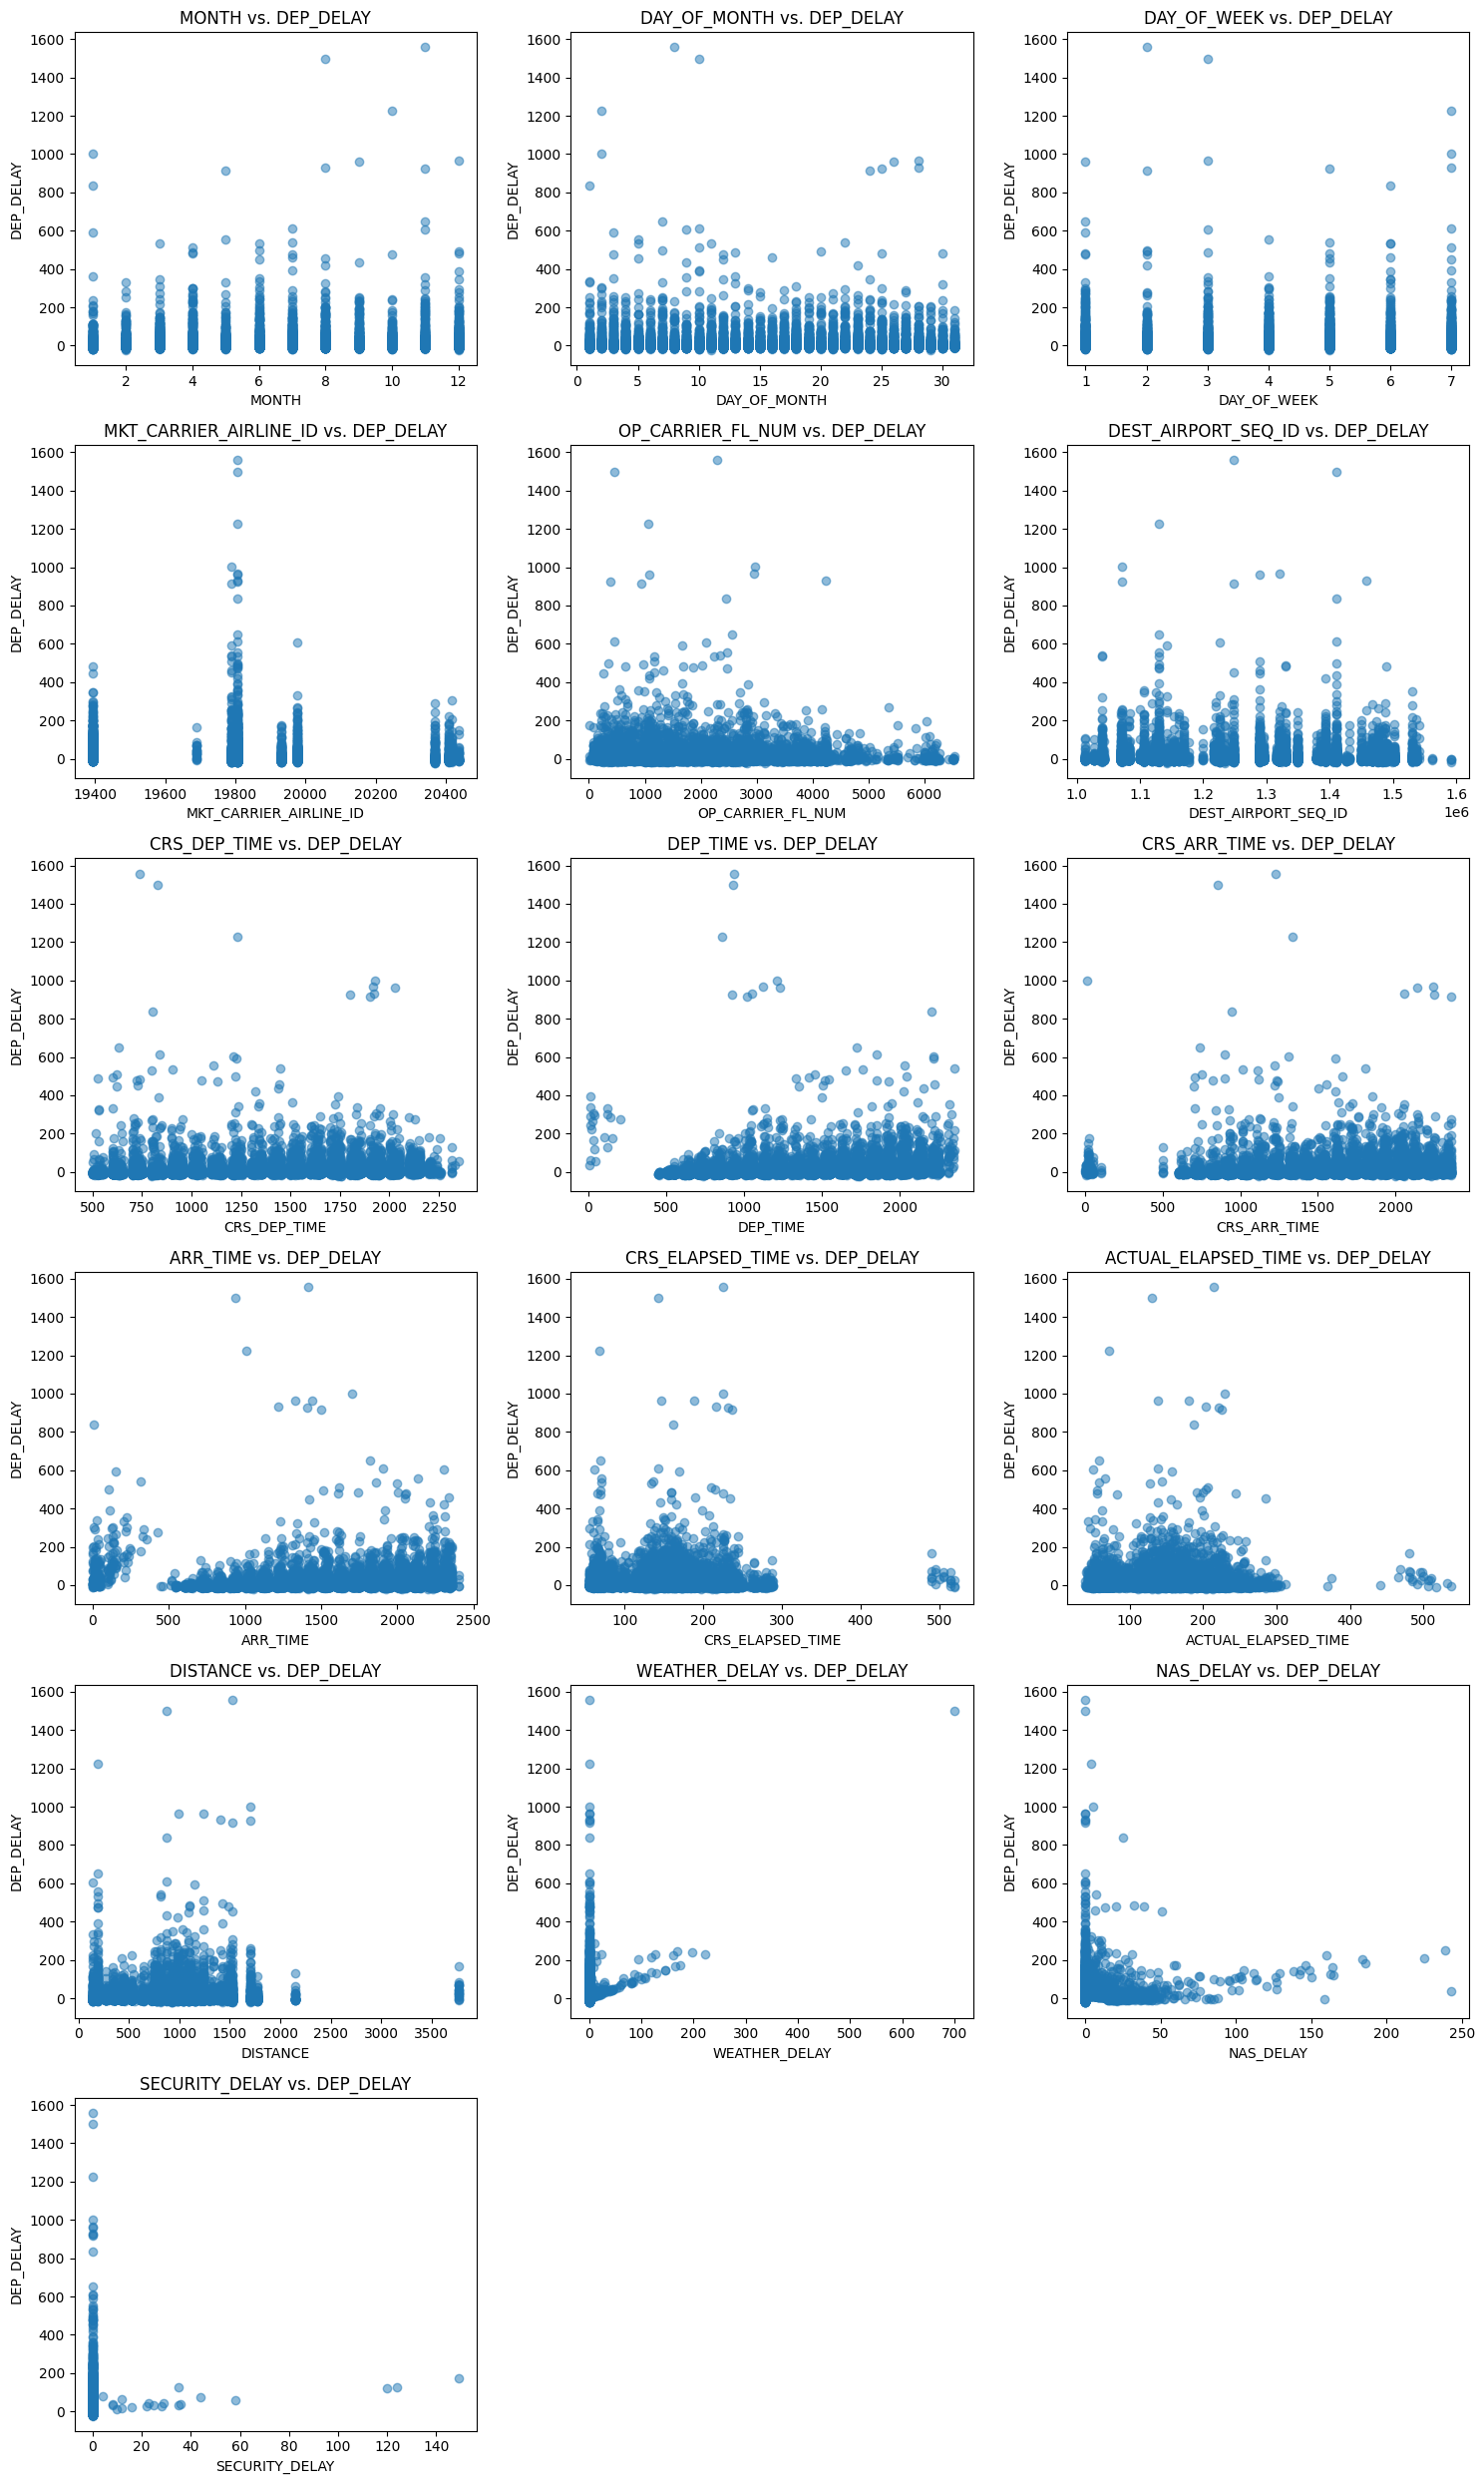

In [94]:
ind_vars = list(db.columns[:-1])
# Do not plot DEP_DELAY by against itself
ind_vars.remove('DEP_DELAY') 

# Compute number of rows and columns for grid of plots
n_cols = 3
n_rows = math.ceil(len(ind_vars) / n_cols)

# Create figure and axis objects for the grid of plots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 25))

# Loop through each independent variable and create a plot
for i, var in enumerate(ind_vars):
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Scatter plot of the independent variable vs. DEP_DELAY
    axs[row_idx, col_idx].scatter(db[var], db['DEP_DELAY'], alpha=0.5)
  
    axs[row_idx, col_idx].set_title(f'{var} vs. DEP_DELAY')
    axs[row_idx, col_idx].set_xlabel(var)
    axs[row_idx, col_idx].set_ylabel('DEP_DELAY')
    
# Hide any unused subplots
for i in range(len(ind_vars), n_rows*n_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    axs[row_idx, col_idx].set_visible(False)
    
fig.tight_layout()
plt.show()

Training RMSE: 1229.407101987354
Test RMSE: 1017.4056424207668


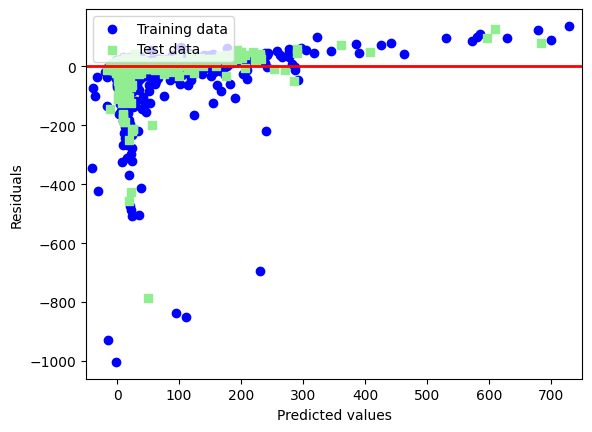

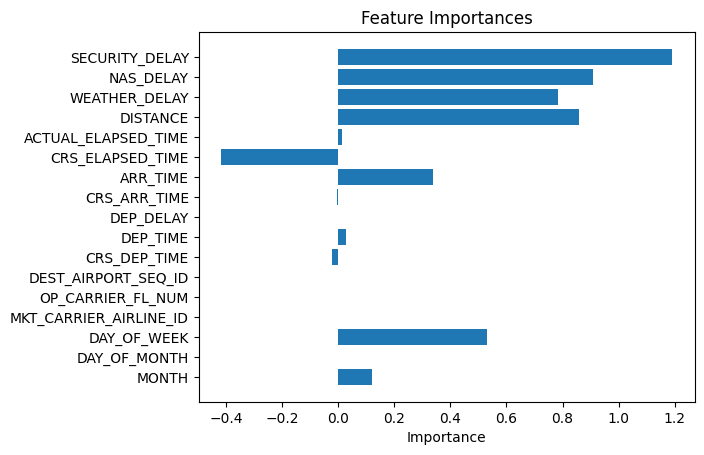

In [95]:
#X = db.iloc[:, :-1].values
#y = db.iloc[:, -1].values
X = db.drop("DEP_DELAY", axis = 1)
y = db.loc[:, 'DEP_DELAY']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the root mean squared error
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

# Print the RMSE values
print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

# Plot the results
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=750, lw=2, color='red')
plt.xlim([-50, 750])
plt.show()

coefficients = regressor.coef_

# Create bar chart
plt.barh(db.columns[:-1], coefficients)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Training set performance:
  Mean squared error: 1229.41
  R-squared: 0.61
Testing set performance:
  Mean squared error: 1017.41
  R-squared: 0.65


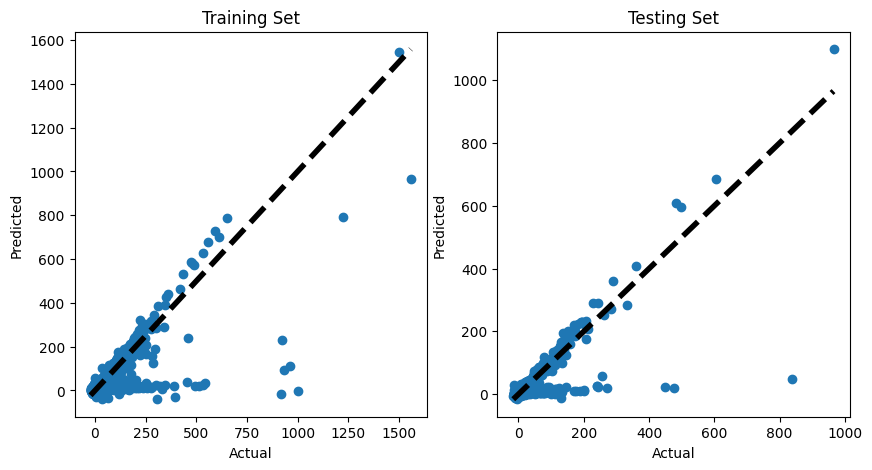

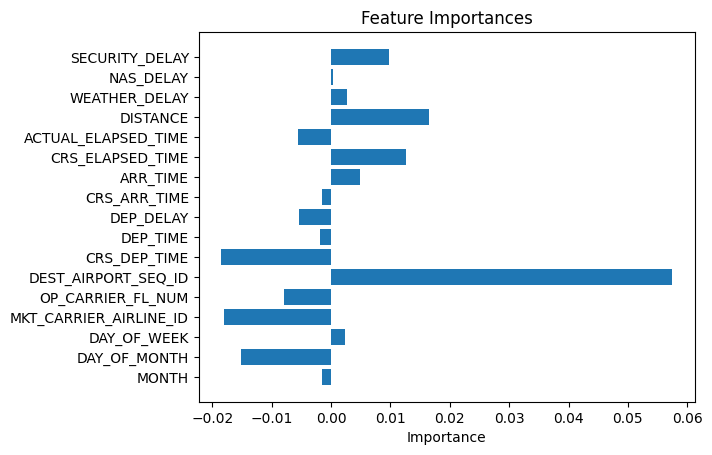

In [96]:
## MLP Regressor

# Create MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Calculate the mean squared error and R-squared values for the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training set performance:")
print(f"  Mean squared error: {train_mse:.2f}")
print(f"  R-squared: {train_r2:.2f}")
print("Testing set performance:")
print(f"  Mean squared error: {test_mse:.2f}")
print(f"  R-squared: {test_r2:.2f}")

# Plot the predicted vs. actual departure delays for the training and testing sets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Training Set')
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Testing Set')
plt.show()

# Plot the feature importances
plt.barh(db.columns[:-1], mlp.coefs_[0].mean(axis=1))
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()